# BREAKING BAD

#### TV Series 2008-2013 Crime/Drama/Thriller

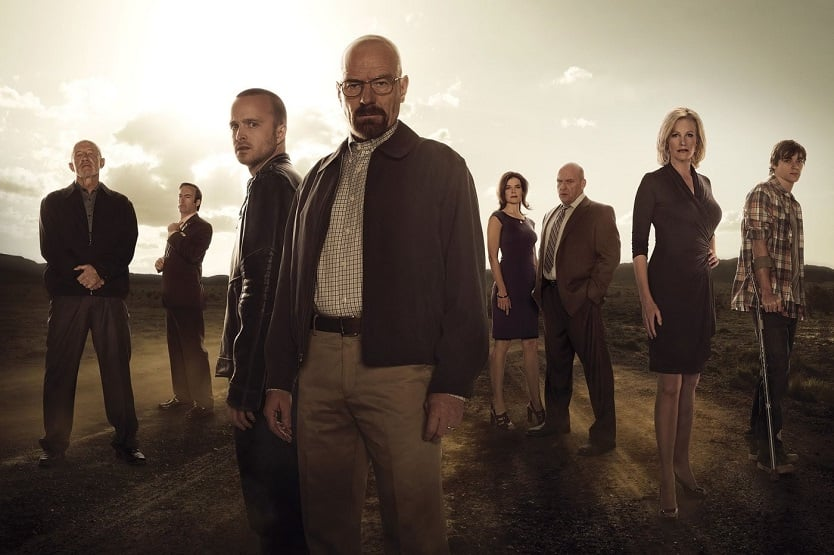

In [3]:
from IPython.display import Image

Image(filename='C://Users//Hande//Desktop//RR_8//amc.jpg')

Breaking Bad is an American crime drama television series created and produced by Vince Gilligan for AMC. Set and filmed in Albuquerque, New Mexico, the series follows Walter White (Bryan Cranston), an underpaid, dispirited high-school chemistry teacher struggling with a recent diagnosis of stage-three lung cancer. White turns to a life of crime and partners with a former student, Jesse Pinkman (Aaron Paul), to produce and distribute methamphetamine to secure his family's financial future before he dies, while navigating the dangers of the criminal underworld. Breaking Bad premiered on AMC on January 20, 2008, and concluded on September 29, 2013, after five seasons consisting of 62 episodes.

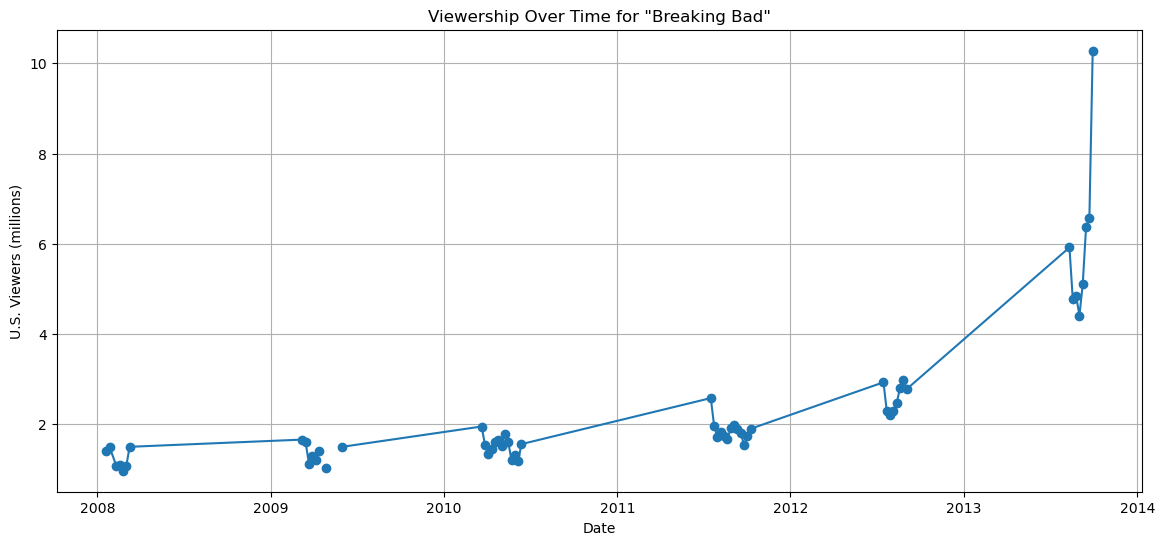

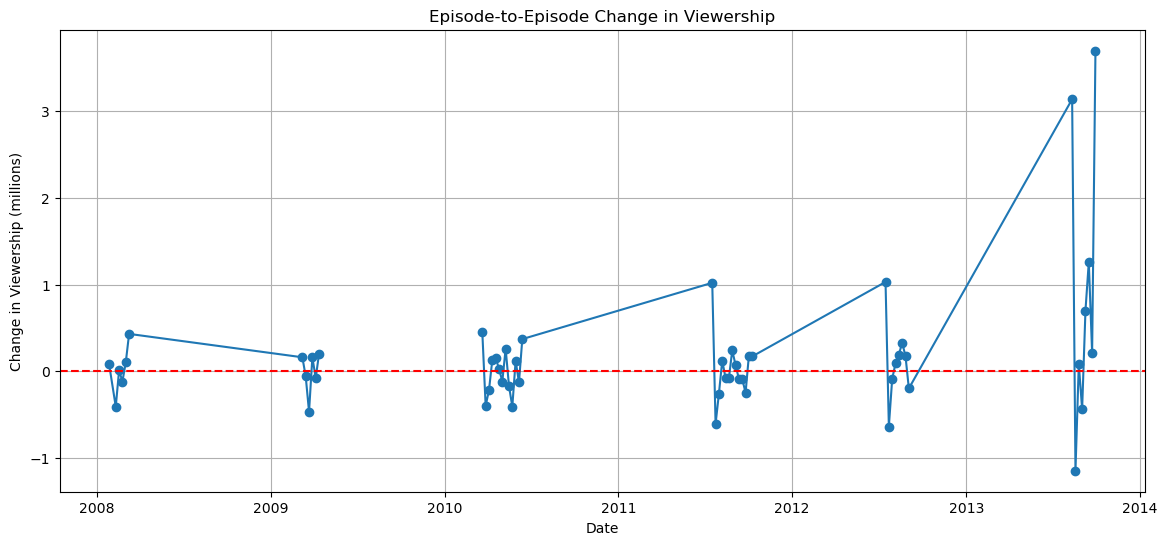

,Rating_IMDB,U.S. viewers_million
count,62.000000,57.000000
mean,9.022581,2.324386
std,0.511962,1.719224
min,7.800000,0.970000
25%,8.700000,1.460000
50%,8.900000,1.710000
75%,9.450000,2.290000
max,10.000000,10.280000


In [16]:
import matplotlib.pyplot as plt

breaking_bad_data = pd.read_csv("C:/Users/Hande/Desktop/RR_8/data/breaking_bad.csv", encoding='ISO-8859-1')


breaking_bad_data['Date'] = pd.to_datetime(breaking_bad_data['Date'])


rating_viewership_stats = breaking_bad_data[['Rating_IMDB', 'U.S. viewers_million']].describe()

# Plotting the viewership over time
plt.figure(figsize=(14, 6))
plt.plot(breaking_bad_data['Date'], breaking_bad_data['U.S. viewers_million'], marker='o', linestyle='-')
plt.title('Viewership Over Time for "Breaking Bad"')
plt.xlabel('Date')
plt.ylabel('U.S. Viewers (millions)')
plt.grid(True)
plt.show()

# episode-to-episode changes in viewership
breaking_bad_data['Viewership_change'] = breaking_bad_data['U.S. viewers_million'].diff()
plt.figure(figsize=(14, 6))
plt.plot(breaking_bad_data['Date'], breaking_bad_data['Viewership_change'], marker='o', linestyle='-')
plt.title('Episode-to-Episode Change in Viewership')
plt.xlabel('Date')
plt.ylabel('Change in Viewership (millions)')
plt.axhline(0, color='red', linestyle='--')  
plt.grid(True)
plt.show()

rating_viewership_stats



In [17]:

season_summary = breaking_bad_data.groupby('Season').agg({
    'Date': ['first', 'last'],
    'Episode': 'count',
    'U.S. viewers_million': ['mean', 'first', 'last']
}).reset_index()


season_summary.columns = [
    'Season', 'First Aired Date', 'Last Aired Date', 'Episodes',
    'Avg. Viewers (millions)', 'First Aired Viewers (millions)', 'Last Aired Viewers (millions)'
]


season_summary['First Aired Date'] = season_summary['First Aired Date'].dt.strftime('%B %d, %Y')
season_summary['Last Aired Date'] = season_summary['Last Aired Date'].dt.strftime('%B %d, %Y')


summary_table = season_summary[['Season', 'Episodes', 'First Aired Date', 'First Aired Viewers (millions)',
                                'Last Aired Date', 'Last Aired Viewers (millions)', 'Avg. Viewers (millions)']]


summary_table


,Season,Episodes,First Aired Date,First Aired Viewers (millions),Last Aired Date,Last Aired Viewers (millions),Avg. Viewers (millions)
0,1,7,"January 20, 2008",1.41,"March 09, 2008",1.50,1.230000
1,2,13,"March 08, 2009",1.66,"May 31, 2009",1.50,1.355000
2,3,13,"March 21, 2010",1.95,"June 13, 2010",1.56,1.516923
3,4,13,"July 17, 2011",2.58,"October 09, 2011",1.90,1.866923
4,5,16,"July 15, 2012",2.93,"September 29, 2013",10.28,4.315625
